In [2]:
import geopandas as gpd
import pandas as pd
import shapely.geometry as sg
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# Lendo arquivos de 2019

In [3]:
df_2019 = {}

df_2019 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2019/_2019.txt', sep='\t')

# Retirando as linhas que possuem coordenadas nulas
df_2019 = df_2019.drop(df_2019[df_2019['COORD.GEO.X'] == 0].index)
df_2019 = df_2019.drop(df_2019[df_2019['COORD.GEO.Y'] == 0].index)

# Filtrando pela província de La Victoria 
df_2019 = df_2019[df_2019['DISTRITO'] == 'LA VICTORIA']


df_2019.sample(10)

C:\Users\Nathalia\AppData\Local\Temp\ipykernel_17064\1618615133.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2019/_2019.txt', sep='\t')


,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
11039668,316127,LA VICTORIA,BT5B,1.0,110.2,0.0,G,13.0,S-00330,1,279616.32,8664961.17,10
9173730,83447,LA VICTORIA,BT5B,0.0,122.0,0.0,G,9.0,A-35145,1,280852.00,8666203.00,9
9305,69259,LA VICTORIA,BT5B,0.0,1173.2,0.0,G,2.0,S-00429,1,278970.67,8666312.95,1
10673505,565443,LA VICTORIA,BT5B,0.0,1258.6,0.0,G,6.0,S-01984,1,281074.36,8665739.44,10
5529960,594723,LA VICTORIA,BT5B,1.0,1903.0,0.0,C,7.0,S-01093,1,281889.62,8663969.00,5
4575220,85985,LA VICTORIA,BT5B,0.0,528.5,0.0,G,9.0,A-35143,1,280573.94,8665898.13,5
13580022,242136,LA VICTORIA,BT5B,0.0,77.2,0.0,G,13,S-00330,1,279785.81,8664945.33,12
4355301,301538,LA VICTORIA,BT5B,0.0,65.2,0.0,G,14.0,S-00814,1,279800.85,8666457.31,4
7443111,1568658,LA VICTORIA,BT3,7.0,1186.8,254.8,G,9.0,S-00194,1,280140.56,8666102.17,7
4516552,1366129,LA VICTORIA,BT5B,0.0,218.5,0.0,G,8.0,A-35231,1,281066.05,8665406.96,4


In [4]:
# Encontrando quantidade de registros nulos e NaN

df_2019.isnull().sum()

NRO_CLIENT     0
DISTRITO       0
TARIFA         0
CATEGORIA      0
CNS_ACT_FP     0
CNS_ACT_HP     0
SET            8
ALIMENTAD      8
SED            7
SEC_TIPICO     0
COORD.GEO.X    0
COORD.GEO.Y    0
MES            0
dtype: int64

In [5]:
# Encontrando registros nulos e NaN

df_2019[df_2019.isnull().transpose().any()]

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
3439413,146773,LA VICTORIA,BT5B,0.0,1309.0,0.0,NaN,NaN,NaN,1,281815.00,8665826.00,4
3445072,186912,LA VICTORIA,BT5B,0.0,3689.7,0.0,NaN,NaN,NaN,1,281812.00,8665829.00,4
3576746,995896,LA VICTORIA,BT5B,0.0,29.3,0.0,NaN,NaN,NaN,1,281818.00,8665824.00,4
3643287,1266746,LA VICTORIA,BT5B,0.0,311.7,0.0,NaN,NaN,NaN,1,281818.00,8665824.00,4
3648133,1311434,LA VICTORIA,BT5B,0.0,14.1,0.0,NaN,NaN,NaN,1,281818.00,8665824.00,4
4531851,1317005,LA VICTORIA,BT5B,0.0,300.8,0.0,NaN,NaN,NaN,1,281818.00,8665824.00,4
5591854,1941409,LA VICTORIA,BT5B,0.0,124.8,0.0,NaN,NaN,NaN,1,280142.24,8665524.09,5
9161685,1948776,LA VICTORIA,BT5B,0.0,1211.4,0.0,NaN,NaN,S-00406,1,279976.38,8664064.41,8


In [6]:
# Verificando todos os tipos de tarifa

df_2019['SET'].unique()

array(['G', 'C', 'SL', 'BJ', 'SI', 'ST', 'A', 'Z', 'U', nan, 'G ', 'C '],
      dtype=object)

In [7]:
# Verificando todos os tipos de tarifa

df_2019['ALIMENTAD'].unique()

array([13.0, 19.0, 18.0, 3.0, 14.0, 21.0, 4.0, 1.0, 9.0, 2.0, 7.0, 6.0,
       10.0, 5.0, 15.0, 8.0, 16.0, 22.0, 20.0, 41.0, 11.0, 17.0, 12.0,
       nan, '18', '21', '01', '06', '19', '13', '10', '09', '14', '03',
       '15', '20', '07', '04', '08', '02', '05', '41', '22'], dtype=object)

In [8]:
# verificando o número de categorias 

df_2019['CATEGORIA'].unique()

# OBS.: O resultado foi do 0 ao 6 e na tabela fornecida ia do 0 ao 8, 
# porém não interfere no nosso trabalho, pois focaremos no residencial (0)

array([0., 1., 4., 5., 8., 7., 2., 3., 6.])

In [9]:
df_filtro_2019 = df_2019[df_2019['TARIFA'] == 'BT5B']
df_filtro_2019 = df_2019[df_2019['CATEGORIA'] == 0]
#df_filtro_2019 = df.drop(['coluna1', 'coluna2', 'coluna3'], axis=1, inplace=True)

df_2019 = df_filtro_2019

df_filtro_2019.sample(5)

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
4565789,37056,LA VICTORIA,BT5B,0.0,799.2,0.0,G,13.0,S-00433,1,279572.33,8666113.22,5
3241726,405320,LA VICTORIA,BT5B,0.0,369.8,0.0,C,6.0,A-11490,1,281551.69,8664059.59,3
4589210,158700,LA VICTORIA,BT5B,0.0,359.2,0.0,G,13.0,S-00330,1,279789.52,8665233.45,5
10350526,192103,LA VICTORIA,BT5B,0.0,226.8,0.0,G,18.0,C-05319,1,279944.40,8664403.92,10
6166231,1495292,LA VICTORIA,BT5B,0.0,54.7,0.0,G,8.0,S-00356,1,280943.21,8665173.13,6


# Lendo Arquivos de 2020

In [10]:
df_2020 = {}

df_2020 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2020/_2020.txt', sep='\t')

# Retirando as linhas que possuem coordenadas nulas
#df_2020 = df_2020.drop(df_2020[df_2020['COORD.GEO.X'] == 0].index)
#df_2020 = df_2020.drop(df_2020[df_2020['COORD.GEO.Y'] == 0].index)

# Filtrando pela província de La Victoria 
df_2020 = df_2020[df_2020['DISTRITO'] == 'LA VICTORIA']


df_2020.sample(10)

C:\Users\Nathalia\AppData\Local\Temp\ipykernel_17064\3788146144.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2020/_2020.txt', sep='\t')


,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
2627602,596336,LA VICTORIA,BT5B,0,122.0,0.0,C,19,S-00331,1,280255.57,8664239.46,3
6380755,219491,LA VICTORIA,BT5B,0,134.0,0.0,G,13,A-35053,1,279337.03,8665431.48,6
10603599,175443,LA VICTORIA,BT5B,0,68.5,0.0,G,15,A-02511,1,280280.74,8665817.24,10
12954682,43810,LA VICTORIA,BT4,8,3699.2,908.4,G,18,S-00036,1,279511.07,8665107.97,12
6519093,73438,LA VICTORIA,BT5B,0,951.0,0.0,G,14,S-00137,1,279954.71,8666169.10,6
7064585,143321,LA VICTORIA,BT5B,0,100.1,0.0,SL,03,A-35123,1,281641.83,8665654.37,7
1428976,368993,LA VICTORIA,BT5B,0,469.0,0.0,C,5,A-04589,1,280996.78,8664623.18,2
7064168,147806,LA VICTORIA,BT5B,0,85.4,0.0,G,06,A-35087,1,281242.40,8665663.36,7
7832377,173186,LA VICTORIA,BT5B,0,334.4,0.0,G,7,S-00300,1,280407.24,8665590.62,7
12881768,539734,LA VICTORIA,BT5B,0,381.0,0.0,C,7,A-35116,1,281291.82,8663316.08,11


In [11]:
# Encontrando quantidade de registros nulos e NaN

df_2020.isnull().sum()

NRO_CLIENT     0
DISTRITO       0
TARIFA         0
CATEGORIA      0
CNS_ACT_FP     0
CNS_ACT_HP     0
SET            0
ALIMENTAD      0
SED            0
SEC_TIPICO     0
COORD.GEO.X    0
COORD.GEO.Y    0
MES            0
dtype: int64

In [12]:
# Encontrando registros nulos e NaN

df_2020[df_2020.isnull().transpose().any()]

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES


In [13]:
df_filtro_2020 = df_2020[df_2020['TARIFA'] == 'BT5B']
df_filtro_2020 = df_2020[df_2020['CATEGORIA'] == 0]

df_2020 = df_filtro_2020

df_filtro_2020.sample(5)

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
9767639,81816,LA VICTORIA,BT5B,0,66.1,0.0,G,7,S-00300,1,280564.00,8665807.00,9
3966199,1473447,LA VICTORIA,BT5B,0,35.0,0.0,G,7,A-35044,1,280809.31,8665853.50,4
1202310,183737,LA VICTORIA,BT5B,0,185.7,0.0,G,14,S-00137,1,279816.30,8666322.55,2
2049444,1538052,LA VICTORIA,BT5B,0,138.5,0.0,C,6,S-01006,1,281366.52,8663963.41,2
10562896,1965182,LA VICTORIA,BT5B,0,94.4,0.0,C,7,S-01007,1,281324.46,8663587.24,9


# Lendo Arquivos de 2021

In [14]:
df_2021 = {}

df_2021 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2021/_2021.txt', sep='\t')

# Retirando as linhas que possuem coordenadas nulas
#df_2021 = df_2021.drop(df_2021[df_2021['COORD.GEO.X'] == 0].index)
#df_2021 = df_2021.drop(df_2021[df_2021['COORD.GEO.Y'] == 0].index)

# Filtrando pela província de La Victoria 
df_2021 = df_2021[df_2021['DISTRITO'] == 'LA VICTORIA']


df_2021.sample(10)

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
8809902,1703766,LA VICTORIA,BT5B,0.0,218.1,0.0,G,18,S-00036,1,279570.25,8665115.00,8
3820874,1368712,LA VICTORIA,BT5B,2.0,0.0,0.0,C,1,A-35152,1,280791.96,8665199.54,4
6336211,653412,LA VICTORIA,BT5B,1.0,0.0,0.0,LU,2,A-35034,1,281095.69,8665639.31,6
1215502,180262,LA VICTORIA,BT5B,0.0,188.0,0.0,C,1,C-08184,1,280759.00,8665388.00,2
1293615,630654,LA VICTORIA,BT5B,0.0,419.5,0.0,G,13,A-35053,1,279349.00,8665649.00,2
14439434,1862255,LA VICTORIA,BT5B,0.0,412.2,0.0,C,7,S-01007,1,281417.90,8663649.00,12
12316432,271906,LA VICTORIA,BT5B,0.0,135.0,0.0,C,19,S-00459,1,280019.28,8663474.33,11
2444382,405933,LA VICTORIA,BT5B,0.0,230.1,0.0,C,5,A-35183,1,280783.00,8664343.00,3
13809674,17261,LA VICTORIA,BT5B,0.0,317.1,0.0,G,18,S-00161,1,279083.49,8665492.76,12
14138267,1695118,LA VICTORIA,BT5B,1.0,1047.9,0.0,LU,6,S-00270,1,281302.34,8665355.00,12


In [15]:
# Encontrando quantidade de registros nulos e NaN

df_2021.isnull().sum()

NRO_CLIENT     0
DISTRITO       0
TARIFA         0
CATEGORIA      3
CNS_ACT_FP     0
CNS_ACT_HP     0
SET            0
ALIMENTAD      0
SED            0
SEC_TIPICO     0
COORD.GEO.X    0
COORD.GEO.Y    0
MES            0
dtype: int64

In [16]:
df_2021[df_2021.isnull().transpose().any()]

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
12018410,2037961,LA VICTORIA,BT5B,NaN,480.0,0.0,G,15,A-35179,1,280555.07,8665315.59,10
13240175,2037961,LA VICTORIA,BT5B,NaN,480.0,0.0,G,15,A-35179,1,280555.07,8665315.59,11
14012915,2037961,LA VICTORIA,BT5B,NaN,89.8,0.0,G,15,A-35179,1,280555.07,8665315.59,12


In [17]:
df_filtro_2021 = df_2021[df_2021['TARIFA'] == 'BT5B']
df_filtro_2021 = df_2021[df_2021['CATEGORIA'] == 0]

df_2021 = df_filtro_2021


df_2021.sample(5)

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
7218154,238747,LA VICTORIA,BT5B,0.0,243.3,0.0,LU,4,S-00308,1,281842.00,8665852.00,7
8008326,50774,LA VICTORIA,BT5B,0.0,257.0,0.0,G,18,S-00161,1,279173.60,8665343.84,7
9642620,239191,LA VICTORIA,BT5B,0.0,153.5,0.0,LU,4,S-00308,1,281842.00,8665852.00,9
12071532,144193,LA VICTORIA,BT5B,0.0,75.2,0.0,G,9,A-35005,1,280665.27,8665981.75,11
5500123,65839,LA VICTORIA,BT5B,0.0,119.0,0.0,G,9,A-02330,1,280702.19,8666333.67,5


# Lendo Arquivos 2022

In [18]:
df_2022 = {}

df_2022 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2022/_2022.txt', sep='\t')

# Retirando as linhas que possuem coordenadas nulas
#df_2022 = df_2022.drop(df_2022[df_2022['COORD.GEO.X'] == 0].index)
#df_2022 = df_2022.drop(df_2022[df_2022['COORD.GEO.Y'] == 0].index)

# Filtrando pela província de La Victoria 
df_2022 = df_2022[df_2022['DISTRITO'] == 'LA VICTORIA']


df_2022.sample(10)

C:\Users\Nathalia\AppData\Local\Temp\ipykernel_17064\3825673154.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(f'C:/Users/Nathalia/Documents/UFPB/PIBIC 2024/Dados/Codigo/_2022/_2022.txt', sep='\t')


,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
8710554,72912,LA VICTORIA,BT5B,5.0,403.0,0.0,LU,1,A-35086,1,281175.02,8665948.35,8
10775820,1389628,LA VICTORIA,BT5B,0.0,1050.5,0.0,C,21,A-35036,1,281086.63,8665671.48,9
6084462,1327886,LA VICTORIA,BT5B,1.0,81.1,0.0,LU,6,A-35019,1,281071.43,8665539.28,5
8699554,27361,LA VICTORIA,BT5B,0.0,98.5,0.0,G,13,C-05301,1,279175.03,8665642.11,8
3407441,134152,LA VICTORIA,BT5B,0.0,333.2,0.0,G,9,S-00147,1,280486.91,8666450.51,3
4996125,246303,LA VICTORIA,BT5B,0.0,0.0,0.0,G,15,S-00661,1,279990.45,8665924.57,5
4816297,954310,LA VICTORIA,BT5B,1.0,252.0,0.0,G,18,C-07974,1,280430.38,8664344.51,4
13350148,1328936,LA VICTORIA,BT5B,0.0,161.7,0.0,C,21,A-35223,1,281002.93,8665615.00,11
11006385,272115,LA VICTORIA,BT5B,0.0,131.9,0.0,C,21,S-00708,1,281390.52,8664801.68,9
14853744,1272471,LA VICTORIA,BT5B,0.0,116.0,0.0,C,2,S-00407,1,280383.81,8664577.59,12


In [19]:
# Encontrando quantidade de registros nulos e NaN

df_2022.isnull().sum()

NRO_CLIENT     0
DISTRITO       0
TARIFA         0
CATEGORIA      2
CNS_ACT_FP     0
CNS_ACT_HP     0
SET            0
ALIMENTAD      0
SED            0
SEC_TIPICO     0
COORD.GEO.X    0
COORD.GEO.Y    0
MES            0
dtype: int64

In [20]:
df_2022[df_2022.isnull().transpose().any()]

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
1197744,2037961,LA VICTORIA,BT5B,NaN,23.3,0.0,G,15,A-35179,1,280555.07,8665315.59,1
2434203,2037961,LA VICTORIA,BT5B,NaN,17.9,0.0,G,15,A-35179,1,280555.07,8665315.59,2


In [21]:
df_filtro_2022 = df_2022[df_2022['TARIFA'] == 'BT5B']
df_filtro_2022 = df_2022[df_2022['CATEGORIA'] == 0]

df_2022 = df_filtro_2022

df_2022.sample(5)

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
4393270,1787892,LA VICTORIA,BT5B,0.0,49.2,0.0,G,13,S-00433,1,279244.70,8666026.98,4
4584170,159140,LA VICTORIA,BT5B,0.0,131.7,0.0,C,1,A-35152,1,280860.29,8665242.27,4
6299118,672262,LA VICTORIA,BT5B,0.0,210.8,0.0,G,9,S-00147,1,280540.76,8666384.02,6
14614152,1386686,LA VICTORIA,BT5B,0.0,115.0,0.0,C,21,A-35033,1,281023.74,8665630.13,12
886983,34429,LA VICTORIA,BT5B,0.0,910.1,0.0,C,5,S-00582,1,281130.09,8664423.29,1


## Preenchendo Arquivos Nulos e/ou NaN

### Df_2022

In [22]:
df_2022[df_2022.NRO_CLIENT == 2037961].head()

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
3674045,2037961,LA VICTORIA,BT5B,0.0,29.2,0.0,G,15,A-35179,1,280555.07,8665315.59,3
4453949,2037961,LA VICTORIA,BT5B,0.0,29.2,0.0,G,15,A-35179,1,280555.07,8665315.59,4
6157809,2037961,LA VICTORIA,BT5B,0.0,48.1,0.0,G,15,A-35179,1,280555.07,8665315.59,5
7405311,2037961,LA VICTORIA,BT5B,0.0,44.4,0.0,G,15,A-35179,1,280555.07,8665315.59,6
8653811,2037961,LA VICTORIA,BT5B,0.0,42.9,0.0,G,15,A-35179,1,280555.07,8665315.59,7


In [23]:
#if pd.isna(df_2022.loc[1197744, 'CATEGORIA']) : df_2022.loc[1197744, 'CATEGORIA'] == 0.0

df_2022['CATEGORIA'].fillna(0.0, inplace=True)

In [24]:
df_2022[df_2022.NRO_CLIENT == 2037961].head()

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
3674045,2037961,LA VICTORIA,BT5B,0.0,29.2,0.0,G,15,A-35179,1,280555.07,8665315.59,3
4453949,2037961,LA VICTORIA,BT5B,0.0,29.2,0.0,G,15,A-35179,1,280555.07,8665315.59,4
6157809,2037961,LA VICTORIA,BT5B,0.0,48.1,0.0,G,15,A-35179,1,280555.07,8665315.59,5
7405311,2037961,LA VICTORIA,BT5B,0.0,44.4,0.0,G,15,A-35179,1,280555.07,8665315.59,6
8653811,2037961,LA VICTORIA,BT5B,0.0,42.9,0.0,G,15,A-35179,1,280555.07,8665315.59,7


### Df_2021

In [25]:
df_2021[df_2021.NRO_CLIENT == 2037961]

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES


In [26]:
df_2021['CATEGORIA'].fillna(0.0, inplace=True)

In [27]:
df_2021[df_2021.NRO_CLIENT == 2037961]

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES


### Df_2019

## Análise e Organização

In [28]:
df_2019.describe()

,NRO_CLIENT,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
count,5.227600e+05,522760.0,522760.000000,522760.000000,522760.000000,522760.000000,5.227600e+05,522760.000000
mean,6.516996e+05,0.0,240.797416,1.472360,1.000002,280563.308372,8.665168e+06,6.509582
std,6.012820e+05,0.0,546.639687,117.979307,0.001383,859.607034,8.763885e+02,3.452854
min,7.000000e+00,0.0,0.000000,0.000000,1.000000,277620.910000,8.604890e+06,1.000000
25%,1.740020e+05,0.0,72.000000,0.000000,1.000000,279907.230000,8.664537e+06,4.000000
50%,3.563695e+05,0.0,146.500000,0.000000,1.000000,280526.610000,8.665362e+06,7.000000
75%,1.251126e+06,0.0,270.600000,0.000000,1.000000,281138.140000,8.665828e+06,10.000000
max,1.969821e+06,0.0,100730.000000,34430.000000,2.000000,321776.270000,8.668456e+06,12.000000


In [29]:
df_2020.describe()

,NRO_CLIENT,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
count,5.291430e+05,529143.0,529143.000000,529143.000000,529143.0,529143.000000,5.291430e+05,529143.000000
mean,6.700742e+05,0.0,266.901653,0.993912,1.0,280460.234751,8.662068e+06,6.524189
std,6.168455e+05,0.0,570.809313,105.842106,0.0,5371.748149,1.637382e+05,3.456475
min,7.000000e+00,0.0,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.000000
25%,1.754050e+05,0.0,69.100000,0.000000,1.0,279898.380000,8.664519e+06,4.000000
50%,3.655420e+05,0.0,152.300000,0.000000,1.0,280523.680000,8.665356e+06,7.000000
75%,1.264134e+06,0.0,297.100000,0.000000,1.0,281137.000000,8.665827e+06,10.000000
max,1.992928e+06,0.0,127950.000000,40770.000000,1.0,358441.720000,8.700258e+06,12.000000


In [30]:
df_2021.describe()

,NRO_CLIENT,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,ALIMENTAD,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
count,5.403140e+05,540314.0,540314.000000,540314.000000,540314.000000,540314.0,540314.000000,5.403140e+05,540314.000000
mean,6.987232e+05,0.0,214.732817,0.808063,10.698327,1.0,280556.510326,8.665130e+06,6.510992
std,6.398546e+05,0.0,389.880518,38.718120,6.875886,0.0,960.413234,1.182350e+04,3.451227
min,7.000000e+00,0.0,0.000000,0.000000,1.000000,1.0,0.000000,0.000000e+00,1.000000
25%,1.784260e+05,0.0,59.000000,0.000000,5.000000,1.0,279886.990000,8.664475e+06,4.000000
50%,3.770430e+05,0.0,136.000000,0.000000,9.000000,1.0,280516.810000,8.665340e+06,7.000000
75%,1.299522e+06,0.0,251.100000,0.000000,18.000000,1.0,281140.760000,8.665823e+06,10.000000
max,2.049657e+06,0.0,34194.400000,5958.000000,41.000000,1.0,358441.720000,8.700258e+06,12.000000


In [31]:
df_2022.describe()

,NRO_CLIENT,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES
count,5.483760e+05,548376.0,548376.000000,548376.000000,548376.0,548376.000000,5.483760e+05,548376.000000
mean,7.291482e+05,0.0,209.144468,0.916603,1.0,280555.362827,8.665132e+06,6.510500
std,6.633181e+05,0.0,384.792020,41.860696,0.0,846.461527,8.631271e+02,3.445948
min,7.000000e+00,0.0,0.000000,0.000000,1.0,277620.910000,8.662908e+06,1.000000
25%,1.809810e+05,0.0,58.000000,0.000000,1.0,279877.150000,8.664436e+06,4.000000
50%,3.908840e+05,0.0,130.100000,0.000000,1.0,280516.870000,8.665321e+06,7.000000
75%,1.344474e+06,0.0,242.300000,0.000000,1.0,281148.220000,8.665816e+06,10.000000
max,2.096694e+06,0.0,65794.000000,5630.000000,1.0,286537.570000,8.669830e+06,12.000000


In [32]:
# Organizando os dados por ordem de NRO_CLIENT
df_2019 = df_2019.sort_values(by=['NRO_CLIENT', 'MES'], ascending=True)
df_2020 = df_2020.sort_values(by=['NRO_CLIENT', 'MES'], ascending=True)
df_2021 = df_2021.sort_values(by=['NRO_CLIENT', 'MES'], ascending=True)
df_2022 = df_2022.sort_values(by=['NRO_CLIENT', 'MES'], ascending=True)


### Criando colunas novas

In [33]:
# A coluna CNS_ACT_SOMA vai ter as duas medições juntas
# A coluna ANO vai ter o ano de cada arquivo

df_2019['CNS_ACT_SOMA'] = df_2019['CNS_ACT_FP'] + df_2019['CNS_ACT_HP']
df_2019['ANO'] = 2019

df_2020['CNS_ACT_SOMA'] = df_2020['CNS_ACT_FP'] + df_2020['CNS_ACT_HP']
df_2020['ANO'] = 2020

df_2021['CNS_ACT_SOMA'] = df_2021['CNS_ACT_FP'] + df_2021['CNS_ACT_HP']
df_2021['ANO'] = 2021

df_2022['CNS_ACT_SOMA'] = df_2022['CNS_ACT_FP'] + df_2022['CNS_ACT_HP']
df_2022['ANO'] = 2022


In [34]:
df_2020.head()

,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES,CNS_ACT_SOMA,ANO
288056,7,LA VICTORIA,BT5B,0,420.7,0.0,C,18,S-00406,1,279818.46,8664208.83,1,420.7,2020
1457115,7,LA VICTORIA,BT5B,0,333.6,0.0,C,18,S-00406,1,279818.46,8664208.83,2,333.6,2020
2628300,7,LA VICTORIA,BT5B,0,421.0,0.0,C,18,S-00406,1,279818.46,8664208.83,3,421.0,2020
3802101,7,LA VICTORIA,BT5B,0,449.0,0.0,C,18,S-00406,1,279818.46,8664208.83,4,449.0,2020
4977577,7,LA VICTORIA,BT5B,0,1066.6,0.0,C,18,S-00406,1,279818.46,8664208.83,5,1066.6,2020


## Separando a Região em Dois Blocos

In [35]:
# Fazendo Pontos a partir das coordenadas, isso é necessário para o geopandas
# criar a coluna geometry do Geodataframe

points = {}

points[1] = df_2019.apply(lambda row: sg.Point(row['COORD.GEO.X'], row['COORD.GEO.Y']), axis=1)
points[2] = df_2020.apply(lambda row: sg.Point(row['COORD.GEO.X'], row['COORD.GEO.Y']), axis=1)
points[3] = df_2021.apply(lambda row: sg.Point(row['COORD.GEO.X'], row['COORD.GEO.Y']), axis=1)
points[4] = df_2022.apply(lambda row: sg.Point(row['COORD.GEO.X'], row['COORD.GEO.Y']), axis=1)



In [36]:
geodf = {}

# Criando os Geodataframes a partir do dataframe e dos pontos criados
geodf[1] = gpd.GeoDataFrame(df_2019, geometry=points[1])
# Setando o sistema de coordenadas para o UTM 18S, que é o sistema de coordenadas dos dados
geodf[1].crs = '32718'
# Convertendo para o sistema de coordenadas geográficas WGS84
# Isso é necessário para o plotly conseguir plotar os pontos
geodf[1] = geodf[1].to_crs('EPSG:4326')


geodf[2] = gpd.GeoDataFrame(df_2020, geometry=points[2])
geodf[2].crs = '32718'
geodf[2] = geodf[2].to_crs('EPSG:4326')

geodf[3] = gpd.GeoDataFrame(df_2021, geometry=points[3])
geodf[3].crs = '32718'
geodf[3] = geodf[3].to_crs('EPSG:4326')

geodf[4] = gpd.GeoDataFrame(df_2022, geometry=points[4])
geodf[4].crs = '32718'
geodf[4] = geodf[4].to_crs('EPSG:4326')

In [37]:
# Subtraindo 0.0022 do x e 0.0032 do y para que os pontos fiquem mais centralizados
# Obs: Isso é necessário pois o plotly não está plotando os pontos no local correto
# Obs2: Não sei porque isso está acontecendo, mas acredito que seja alguma conversão de sistema de coordenadas
# Obs3: Esses valores foram encontrados na tentativa e erro, não sei se são os valores corretos

for i in range (1, 5):
    geodf[i]['geometry'] = geodf[i]['geometry'].apply(lambda x: sg.Point(x.x - 0.0022, x.y - 0.0032))

In [38]:
# Os quadrados escolhidos para análise foram os 296 e 316 do outro código 
square_216 = [
    sg.Point(-77.0019956353078, -12.06870647082062), 
    sg.Point(-77.0019956353078, -12.065700086444597), 
    sg.Point(-77.00500201968381, -12.065700086444597), 
    sg.Point(-77.00500201968381, -12.06870647082062), 
    sg.Point(-77.0019956353078, -12.06870647082062)
]

square_316 = [
    sg.Point(-76.99898925093177, -12.06870647082062), 
    sg.Point(-76.99898925093177, -12.065700086444597), 
    sg.Point(-77.0019956353078, -12.065700086444597),
    sg.Point(-77.0019956353078, -12.06870647082062), 
    sg.Point(-76.99898925093177, -12.06870647082062)
    ]

In [39]:
# Irei filtrar os geodataframes de forma a restar apenas as linhas que possuem 
# pontos dentro do quadrado 216 e 316, além de criar a coluna "quadrado" que
# indica em qual quadrado o ponto está

#geodf['quadrado'] = geodf['geometry'].apply(lambda x: '216' if sg.Point(x.x, x.y).within(sg.Polygon(square_216)) else '316' if sg.Point(x.x, x.y).within(sg.Polygon(square_316)) else 'outro')
#geodf = geodf[geodf['quadrado'] != 'outro']

for i in range(1, 5):
    geodf[i]['quadrado'] = geodf[i]['geometry'].apply(lambda x: '216' if sg.Point(x.x, x.y).within(sg.Polygon(square_216)) else '316' if sg.Point(x.x, x.y).within(sg.Polygon(square_316)) else 'outro')
    geodf[i] = geodf[i][geodf[i]['quadrado'] != 'outro']

# Juntando os Arquivos

In [40]:
# Juntarei os geodataframes de 2001 a 2012 em um único geodataframe, adicionando a coluna "datetime"
# que indica o ano e mês, representado pela coluna "MES", da linha no formato AAAA-MM

dfs_to_concat = geodf
geodf_geral = gpd.GeoDataFrame(pd.concat(dfs_to_concat, ignore_index=True))

geodf_geral['datetime'] = geodf_geral.apply(lambda row: f'{row["ANO"]}-{row["MES"]}', axis=1)

geodf_geral.sample(15)


,NRO_CLIENT,DISTRITO,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,COORD.GEO.X,COORD.GEO.Y,MES,CNS_ACT_SOMA,ANO,geometry,quadrado,datetime
38428,1943377,LA VICTORIA,BT5B,0.0,121.3,0.0,LU,4,A-03731,1,282001.39,8665561.63,5,121.3,2021,POINT (-77.00488 -12.06730),216,2021-5
31541,817246,LA VICTORIA,BT5B,0.0,232.0,0.0,SL,3,A-03643,1,282462.74,8665633.70,4,232.0,2021,POINT (-77.00063 -12.06668),316,2021-4
25769,39879,LA VICTORIA,BT5B,0.0,243.0,0.0,SL,3,A-03643,1,282189.39,8665494.33,12,243.0,2021,POINT (-77.00315 -12.06792),216,2021-12
17311,816788,LA VICTORIA,BT5B,0.0,419.0,0.0,SL,4,A-03731,1,282100.00,8665658.00,1,419.0,2020,POINT (-77.00396 -12.06644),216,2020-1
39836,816374,LA VICTORIA,BT5B,0.0,179.0,0.0,SL,3,S-00305,1,282624.55,8665602.39,10,179.0,2022,POINT (-76.99915 -12.06697),316,2022-10
48503,1250401,LA VICTORIA,BT5B,0.0,293.6,0.0,LU,4,A-03645,1,282251.97,8665726.70,12,293.6,2022,POINT (-77.00256 -12.06583),216,2022-12
17069,816767,LA VICTORIA,BT5B,0.0,307.2,0.0,SL,4,A-03731,1,282086.00,8665702.00,11,307.2,2020,POINT (-77.00409 -12.06604),216,2020-11
4977,817156,LA VICTORIA,BT5B,0.0,161.4,0.0,SL,4.0,A-03644,1,282572.28,8665688.01,8,161.4,2019,POINT (-76.99963 -12.06620),316,2019-8
23712,1383912,LA VICTORIA,BT5B,0.0,281.0,0.0,SL,3,A-03643,1,282441.86,8665653.04,11,281.0,2020,POINT (-77.00082 -12.06650),316,2020-11
36593,1381999,LA VICTORIA,BT5B,0.0,405.7,0.0,LU,4,A-03731,1,282163.35,8665682.96,6,405.7,2021,POINT (-77.00338 -12.06622),216,2021-6


In [41]:
# Excluindo as colunas que não serão utilizadas
geodf_geral = geodf_geral.drop(columns=['COORD.GEO.Y', 'COORD.GEO.X', 'geometry', 'DISTRITO']) # Deixei mês e ano que Hyago não usou
geodf_geral.head()

,NRO_CLIENT,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,MES,CNS_ACT_SOMA,ANO,quadrado,datetime
0,1583,BT5B,0.0,188.3,0.0,SL,4.0,S-00744,1,1,188.3,2019,216,2019-1
1,1583,BT5B,0.0,187.5,0.0,SL,4.0,S-00744,1,2,187.5,2019,216,2019-2
2,1583,BT5B,0.0,189.0,0.0,SL,4.0,S-00744,1,3,189.0,2019,216,2019-3
3,1583,BT5B,0.0,189.8,0.0,SL,4.0,S-00744,1,4,189.8,2019,216,2019-4
4,1583,BT5B,0.0,175.3,0.0,SL,4.0,S-00744,1,5,175.3,2019,216,2019-5


## Convertendo o Geodataframe

In [42]:
geodf_geral.to_csv('geodf_geral.csv', index=False)

In [43]:
geodf_geral = pd.read_csv('geodf_geral.csv')
geodf_geral.sample(5)

,NRO_CLIENT,TARIFA,CATEGORIA,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,MES,CNS_ACT_SOMA,ANO,quadrado,datetime
50778,1840096,BT5B,0.0,92.3,0.0,SL,3.0,A-03643,1,6,92.3,2022,316,2022-6
1184,816377,BT5B,0.0,429.9,0.0,SL,3.0,S-00305,1,9,429.9,2019,316,2019-9
45002,817310,BT5B,0.0,14.8,0.0,SL,3.0,A-03643,1,6,14.8,2022,216,2022-6
25895,161944,BT5B,0.0,0.0,0.0,LU,4.0,S-00307,1,6,0.0,2021,216,2021-6
16749,816735,BT5B,0.0,107.0,0.0,SL,4.0,A-03731,1,3,107.0,2020,216,2020-3


In [44]:
#Vendo quantas o máximo e o mínimo de vezes que houve uma medição feita para os clientes

geodf_geral['NRO_CLIENT'].value_counts()

# Questionamento: Vale a pena colocar clientes com quase nenhuma medição? 

NRO_CLIENT
817345     48
817508     48
817554     48
817555     48
817556     48
           ..
2079505     1
2079506     1
2079507     1
2079508     1
2093258     1
Name: count, Length: 1129, dtype: int64

In [45]:
geodf_geral['ANO'].value_counts()


ANO
2022    13086
2021    13015
2020    12911
2019    12811
Name: count, dtype: int64

In [46]:
geodf_geral = geodf_geral.drop(columns=['TARIFA', 'CATEGORIA']) # Esses valores não mudam, então vou retirá-los
geodf_geral.sample(10)

,NRO_CLIENT,CNS_ACT_FP,CNS_ACT_HP,SET,ALIMENTAD,SED,SEC_TIPICO,MES,CNS_ACT_SOMA,ANO,quadrado,datetime
16837,816744,124.0,0.0,SL,4.0,A-03731,1,7,124.0,2020,216,2020-7
13410,355502,0.0,0.0,SL,3.0,S-00305,1,12,0.0,2020,316,2020-12
109,48851,202.0,0.0,SL,4.0,A-03646,1,2,202.0,2019,216,2019-2
1760,816437,136.5,0.0,SL,3.0,A-03643,1,9,136.5,2019,316,2019-9
4225,816762,190.8,0.0,SL,4.0,A-03731,1,12,190.8,2019,216,2019-12
41455,816546,808.2,0.0,SL,3.0,C-08901,1,3,808.2,2022,216,2022-3
6184,817280,112.4,0.0,SL,3.0,A-03643,1,12,112.4,2019,316,2019-12
48438,1247172,176.7,0.0,SL,3.0,C-08901,1,2,176.7,2022,216,2022-2
15747,816568,295.8,0.0,SL,3.0,C-08901,1,9,295.8,2020,216,2020-9
20449,817507,1107.0,0.0,SL,3.0,A-03643,1,12,1107.0,2020,316,2020-12


In [47]:
# Colocando o index como nro do cliente

#df_2019 = df_2019.set_index('NRO_CLIENT')
#df_2020 = df_2020.set_index('NRO_CLIENT')
#df_2021 = df_2021.set_index('NRO_CLIENT')
#df_2022 = df_2022.set_index('NRO_CLIENT')

#df_2019.head()

# Consumo por cliente

In [59]:
# Estou pegando a coluna com a soma d dos clo consumoientes durante todos esses anos e transformando 
# em uma série para ver se posso separar os tipos de cliente 

'''consumo_clientes = geodf_geral.set_index('NRO_CLIENT') #trocando o index pelo número do cliente
consumo_clientes = geodf_geral[['NRO_CLIENT','CNS_ACT_SOMA']].groupby('NRO_CLIENT').sum().CNS_ACT_SOMA.sort_values(ascending = False)

consumo_clientes
'''
# OBS final: Não achei a métrica boa, pois tem cliente que a soma acumulada é de 4 anos consecutivos
# e cliente que a soma acumulada é de alguns meses

"consumo_clientes = geodf_geral.set_index('NRO_CLIENT') #trocando o index pelo número do cliente\nconsumo_clientes = geodf_geral[['NRO_CLIENT','CNS_ACT_SOMA']].groupby('NRO_CLIENT').sum().CNS_ACT_SOMA.sort_values(ascending = False)\n\nconsumo_clientes\n"

In [49]:
# Cálculo do consumo médio por cliente considerando os dois quadrados

consumo_medio = geodf_geral.groupby('NRO_CLIENT')['CNS_ACT_SOMA'].mean()
consumo_medio

NRO_CLIENT
1583       131.353488
18711      404.477083
19762      291.735417
39879      258.591667
39880      413.900000
              ...    
2079507    314.500000
2079508     17.600000
2081533    204.520000
2090710     55.366667
2093258    133.300000
Name: CNS_ACT_SOMA, Length: 1129, dtype: float64

In [50]:
# Consumo médio apenas do quadrado 216

consumo_medio_216 = geodf_geral[geodf_geral['quadrado'] == 216].groupby('NRO_CLIENT')['CNS_ACT_SOMA'].mean()
consumo_medio_216

NRO_CLIENT
1583       131.353488
19762      291.735417
39879      258.591667
39880      413.900000
39881       91.612500
              ...    
2079507    314.500000
2079508     17.600000
2081533    204.520000
2090710     55.366667
2093258    133.300000
Name: CNS_ACT_SOMA, Length: 667, dtype: float64

In [51]:
# Consumo médio apenas do quadrado 316

consumo_medio_316 = geodf_geral[geodf_geral['quadrado'] == 316].groupby('NRO_CLIENT')['CNS_ACT_SOMA'].mean()
consumo_medio_316

NRO_CLIENT
18711      404.477083
43215      428.625000
48245      141.004167
51139       57.783333
200296     166.520833
              ...    
2057639    156.200000
2059893    154.320000
2062804     65.900000
2077733    181.700000
2077999    146.450000
Name: CNS_ACT_SOMA, Length: 465, dtype: float64

In [52]:
#Colocando os dados em um gráfico

''''plt.figure(figsize = (15,5))
plt.plot(consumo_medio, consumo_medio.values)
plt.title('Média da receita por clientes')'''

'''consumo_medio.plot(kind='line', figsize=(20,10))

plt.title('Consumo Médio por Cliente')
plt.xlabel('NRO_CLIENT')
plt.ylabel('CNS_ACT_SOMA')
plt.xticks(rotation=45)
plt.show()'''

"consumo_medio.plot(kind='line', figsize=(20,10))\n\nplt.title('Consumo Médio por Cliente')\nplt.xlabel('NRO_CLIENT')\nplt.ylabel('CNS_ACT_SOMA')\nplt.xticks(rotation=45)\nplt.show()"

In [53]:
import plotly.express as px

# Transformando a série em um DataFrame para facilitar a visualização
df_consumo_medio = consumo_medio.reset_index()

# Criando o gráfico interativo
fig = px.line(df_consumo_medio, x='NRO_CLIENT', y='CNS_ACT_SOMA', 
              title='Consumo Médio por Cliente', 
              labels={'NRO_CLIENT': 'Número do Cliente', 'CNS_ACT_SOMA': 'Consumo Médio'})

# Mostrando o gráfico
fig.show()


In [54]:
df_consumo_medio_216 = consumo_medio_216.reset_index()

fig_2 = px.line(df_consumo_medio_216, x='NRO_CLIENT', y='CNS_ACT_SOMA', 
              title='Consumo Médio por Cliente no Quadrado 216', 
              labels={'NRO_CLIENT': 'Número do Cliente', 'CNS_ACT_SOMA': 'Consumo Médio'})
fig_2.show()


In [55]:
# Transformando a série em um DataFrame para facilitar a visualização
df_consumo_medio_316 = consumo_medio_316.reset_index()

fig_3 = px.line(df_consumo_medio_316, x='NRO_CLIENT', y='CNS_ACT_SOMA', 
              title='Consumo Médio por Cliente no Quadrado 316', 
              labels={'NRO_CLIENT': 'Número do Cliente', 'CNS_ACT_SOMA': 'Consumo Médio'})
fig_3.show()


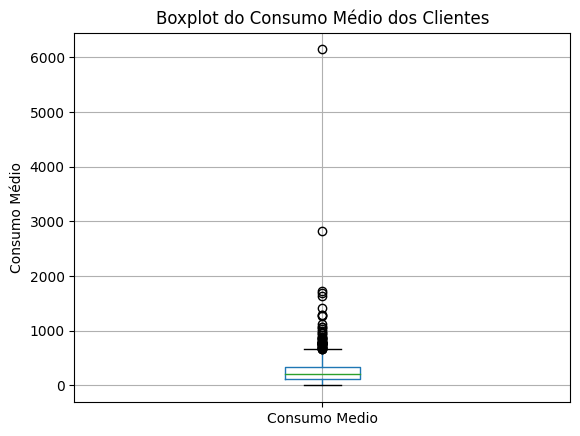

In [77]:
# Boxplot serve para ver uma média de valores, a linha verde é a mediana e os pontos são os outliers
# Esses outliers são os valores "fora da curva"
# Como a quantidade de outiers é muito grande e não houve classificação dos dados não consigo tirar
# Nenhuma conclusão com isso no momento

df_consumo_medio = consumo_medio.to_frame(name='Consumo Medio') # Não podemos fazer o boxplot de uma série, converti para df de novo
df_consumo_medio.boxplot(column='Consumo Medio')
plt.title('Boxplot do Consumo Médio dos Clientes')
plt.ylabel('Consumo Médio')
plt.show()

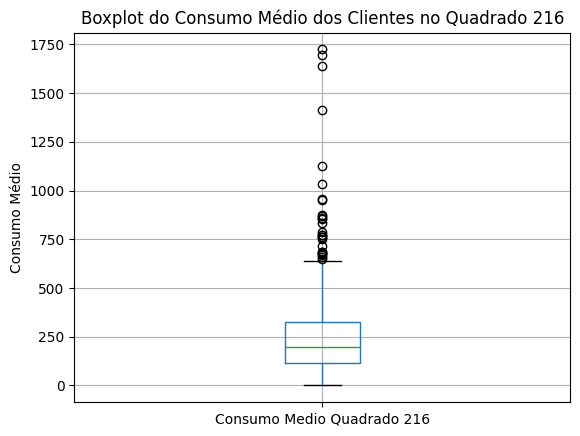

In [79]:
df_consumo_medio_216 = consumo_medio_216.to_frame(name='Consumo Medio Quadrado 216') # Não podemos fazer o boxplot de uma série, converti para df de novo
df_consumo_medio_216.boxplot(column='Consumo Medio Quadrado 216')
plt.title('Boxplot do Consumo Médio dos Clientes no Quadrado 216')
plt.ylabel('Consumo Médio')
plt.show()

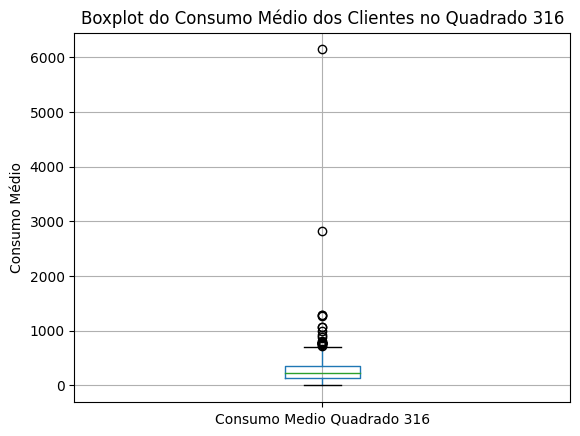

In [80]:
df_consumo_medio_316 = consumo_medio_316.to_frame(name='Consumo Medio Quadrado 316') 
df_consumo_medio_316.boxplot(column='Consumo Medio Quadrado 316')
plt.title('Boxplot do Consumo Médio dos Clientes no Quadrado 316')
plt.ylabel('Consumo Médio')
plt.show()

In [81]:
# OBS: NÃO PRETENDO TIRAR OS OUTLIERS, POIS ELES PODEM SER POSSÍVEIS ANOMALIAS. 
# JÁ QUE OUTLIERS SÃO VALORES FORA MÉDIA GERAL

# ALÉM DISSO, PODEM REPRESENTAR BAIRROS COM TENDÊNCIAS DE CONSUMO DIFERENTES
# IREMOS FAZER ESSA SEPARAÇÃO NA CLASSIFICAÇÃO DOS DADOS

# Padronização e Normalização dos dados

In [84]:
df_normalizado = geodf_geral.drop(columns=['SET', 'SED', 'SEC_TIPICO'])
df_normalizado

,NRO_CLIENT,CNS_ACT_FP,CNS_ACT_HP,ALIMENTAD,MES,CNS_ACT_SOMA,ANO,quadrado,datetime
0,1583,188.3,0.0,4.0,1,188.3,2019,216,2019-1
1,1583,187.5,0.0,4.0,2,187.5,2019,216,2019-2
2,1583,189.0,0.0,4.0,3,189.0,2019,216,2019-3
3,1583,189.8,0.0,4.0,4,189.8,2019,216,2019-4
4,1583,175.3,0.0,4.0,5,175.3,2019,216,2019-5
...,...,...,...,...,...,...,...,...,...
51818,2081533,218.4,0.0,4.0,12,218.4,2022,216,2022-12
51819,2090710,29.0,0.0,4.0,10,29.0,2022,216,2022-10
51820,2090710,63.0,0.0,4.0,11,63.0,2022,216,2022-11
51821,2090710,74.1,0.0,4.0,12,74.1,2022,216,2022-12


In [89]:
geodf_geral['CNS_ACT_HP'].unique()

array([0.])

In [92]:
df_normalizado['CNS_ACT_SOMA'] = df_normalizado['CNS_ACT_SOMA']/df_normalizado['CNS_ACT_SOMA'].max()
df_normalizado['CNS_ACT_FP'] = df_normalizado['CNS_ACT_FP']/df_normalizado['CNS_ACT_FP'].max()
# Como o consumo HP é 0 estou pensando em apagar a coluna

df_normalizado

,NRO_CLIENT,CNS_ACT_FP,CNS_ACT_HP,ALIMENTAD,MES,CNS_ACT_SOMA,ANO,quadrado,datetime
0,1583,0.009946,0.0,4.0,1,0.009946,2019,216,2019-1
1,1583,0.009904,0.0,4.0,2,0.009904,2019,216,2019-2
2,1583,0.009983,0.0,4.0,3,0.009983,2019,216,2019-3
3,1583,0.010025,0.0,4.0,4,0.010025,2019,216,2019-4
4,1583,0.009259,0.0,4.0,5,0.009259,2019,216,2019-5
...,...,...,...,...,...,...,...,...,...
51818,2081533,0.011536,0.0,4.0,12,0.011536,2022,216,2022-12
51819,2090710,0.001532,0.0,4.0,10,0.001532,2022,216,2022-10
51820,2090710,0.003328,0.0,4.0,11,0.003328,2022,216,2022-11
51821,2090710,0.003914,0.0,4.0,12,0.003914,2022,216,2022-12


In [108]:
df_consumo_medio

,Consumo Medio
NRO_CLIENT,
1583,131.353488
18711,404.477083
19762,291.735417
39879,258.591667
39880,413.900000
...,...
2079507,314.500000
2079508,17.600000
2081533,204.520000


In [117]:
# Para realizar o standardization dos dados

from sklearn.preprocessing import StandardScaler

df_scaler = df_consumo_medio
scaler = StandardScaler()

# Para manter o número do cliente depois do escalonamento
# Reset o índice para tornar NRO_CLIENT uma coluna
df_scaler = df_scaler.reset_index()

# Agora aplique o scaler apenas na coluna de interesse
df_scaler['CNS_MED_SCALED'] = scaler.fit_transform(df_scaler[['Consumo Medio']])

In [119]:
# Convertemos para DataFrame

scaler_data = df_scaler[['NRO_CLIENT', 'CNS_MED_SCALED']]
scaler_data


,NRO_CLIENT,CNS_MED_SCALED
0,1583,-0.491378
1,18711,0.476980
2,19762,0.077255
3,39879,-0.040256
4,39880,0.510389
...,...,...
1124,2079507,0.157967
1125,2079508,-0.894691
1126,2081533,-0.231967
1127,2090710,-0.760789


In [121]:
# Valores de interesse de conhecimento pelo describe:
# Saber a média, desvio padrão, mínimos e máximos da coluna de consumo

scaler_data.describe()

,NRO_CLIENT,CNS_MED_SCALED
count,1.129000e+03,1.129000e+03
mean,1.008866e+06,-1.447518e-16
std,4.289890e+05,1.000443e+00
min,1.583000e+03,-9.570914e-01
25%,8.166460e+05,-5.222438e-01
50%,8.173430e+05,-2.089919e-01
75%,1.273382e+06,2.520555e-01
max,2.093258e+06,2.081673e+01


# Machine Learning

In [ ]:
#dfML = [['coluna a', 'coluna b', ...]]